In [1]:
import sys
import numpy as np
from apply_ltspice_filter import apply_ltspice_filter
import matplotlib.pyplot as plt
from sigproc_kit import *
from my_utils import *

#if installed in a non-standard directory
ltspice_command = "wine /LTspiceXVII/XVIIx64.exe -Run -b"


circuit_file = "spice/vca_01.asc"


Found Numpy. WIll be used for storing data


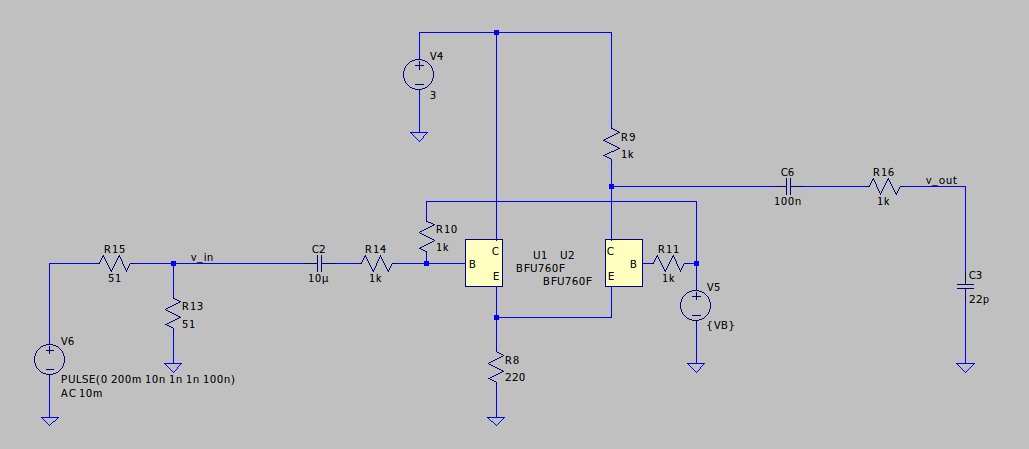

In [2]:
from IPython.display import Image

with open('./084963429f4e42ebcec8b9a1afe47a36.png','rb') as f:
    display(Image(data=f.read(), format='png'))

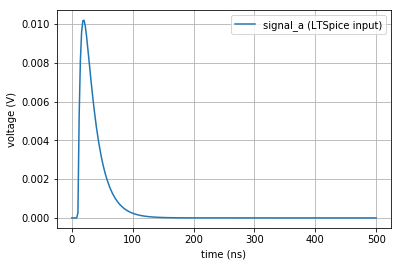

In [3]:
##################################################
##             generate test signal             ##
##################################################

# our samples shall be 100 ms wide
sample_width=0.5e-6
# time step between samples: 0.1 ms
delta_t=2e-9
samples = int(sample_width/delta_t)

time = np.linspace(0,sample_width,samples)

signal_a = detector_signal_function(time,6.5e-12,5e-9,20e-9,10e-9)

plt.plot(time*1e9,signal_a, label="signal_a (LTSpice input)")
plt.xlabel("time (ns)")
plt.ylabel("voltage (V)")
plt.grid(True)

plt.legend()
plt.show()


In [4]:
##################################################
##        apply filter - configuration 1        ##
##################################################

# all values in SI units
configuration_1 = {
  "VB":1.2 
}

dummy, signal_b1 = apply_ltspice_filter(
      circuit_file,
      time, signal_a,
      params=configuration_1,
      ltspice_command = ltspice_command
      )


Normal access


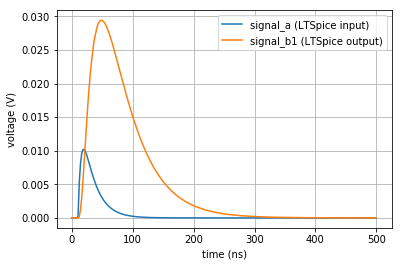

In [5]:
##################################################
##           plot input vs output(s)            ##
##################################################
  
plt.plot(time*1e9,signal_a, label="signal_a (LTSpice input)")
plt.plot(time*1e9,signal_b1, label="signal_b1 (LTSpice output)")
plt.xlabel("time (ns)")
plt.ylabel("voltage (V)")
#plt.ylim((-1,4.5))
plt.grid(True)

plt.legend()
plt.show()

trancmd.txt has not changed
param.txt has not changed
vca_01.asc is older than vca_01.raw
Normal access
trancmd.txt has not changed
param.txt has not changed
vca_01.asc is older than vca_01.raw
Normal access
trancmd.txt has not changed
param.txt has not changed
vca_01.asc is older than vca_01.raw
Normal access
trancmd.txt has not changed
param.txt has not changed
vca_01.asc is older than vca_01.raw
Normal access
trancmd.txt has not changed
param.txt has not changed
vca_01.asc is older than vca_01.raw
Normal access
trancmd.txt has not changed
param.txt has not changed
vca_01.asc is older than vca_01.raw
Normal access
trancmd.txt has not changed
param.txt has not changed
vca_01.asc is older than vca_01.raw
Normal access
trancmd.txt has not changed
param.txt has not changed
vca_01.asc is older than vca_01.raw
Normal access
trancmd.txt has not changed
param.txt has not changed
vca_01.asc is older than vca_01.raw
Normal access
trancmd.txt has not changed
param.txt has not changed
vca_01.asc

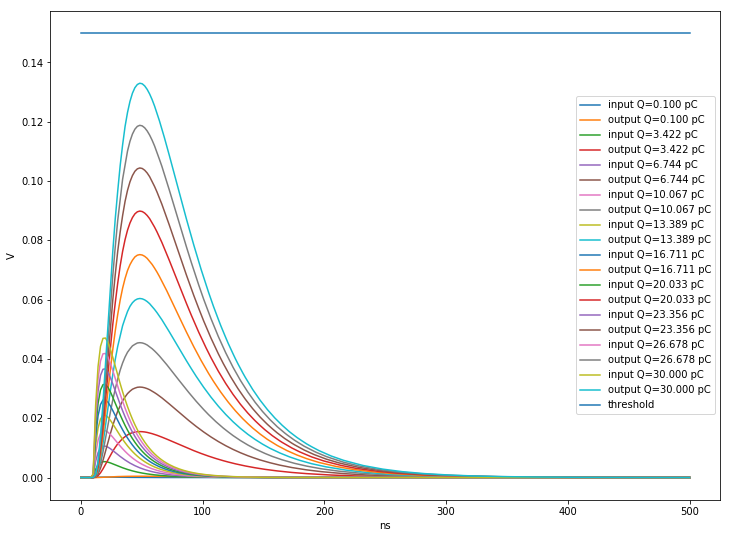

In [5]:
##################################################
##                    Q scan                    ##
##################################################
big_figure()

thresh = 150e-3

Q_list = []
tot_list = []
in_amp_list = []
out_amp_list = []

for Q in np.linspace(0.1e-12,30e-12,10):
  Q_list += [Q]
  signal_a = detector_signal_function(time,Q,5e-9,20e-9,10e-9)
  dummy, signal_b1 = apply_ltspice_filter(
        circuit_file,
        time, signal_a,
        params=configuration_1,
        ltspice_command = ltspice_command
        )
  dummy, t1, tot = discriminate(time,signal_b1,thresh)
  tot_list += [tot]
  plt.plot(time*1e9,signal_a, label="input Q={:3.3f} pC".format(Q*1e12))
  plt.plot(time*1e9,signal_b1, label="output Q={:3.3f} pC".format(Q*1e12))

  out_amp_list += [np.max(abs(signal_b1))]
  in_amp_list += [np.max(abs(signal_a))]
    
plt.plot(time*1e9,time*0 + thresh, label="threshold".format(Q*1e12))

Q = np.array(Q_list)    
out_amp = np.array(out_amp_list)    
in_amp = np.array(in_amp_list)    
tot = np.array(tot_list)
    
plt.legend()
plt.xlabel("ns")
plt.ylabel("V")
plt.show()


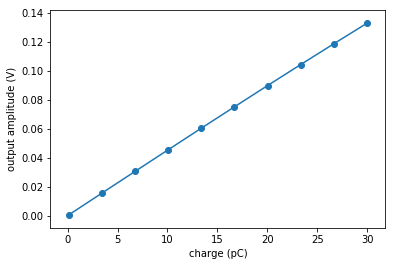

In [6]:
small_figure()

plt.plot(abs(Q*1e12),out_amp)
plt.scatter(abs(Q*1e12),out_amp)
plt.xlabel("charge (pC)")
plt.ylabel("output amplitude (V)")
plt.show()

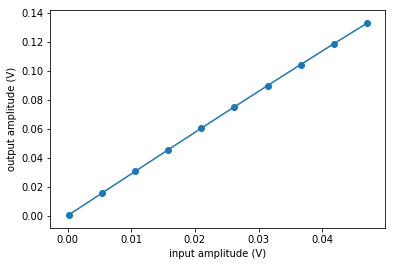

In [7]:
plt.plot(in_amp,out_amp)
plt.scatter(in_amp,out_amp)
plt.xlabel("input amplitude (V)")
plt.ylabel("output amplitude (V)")
plt.show()

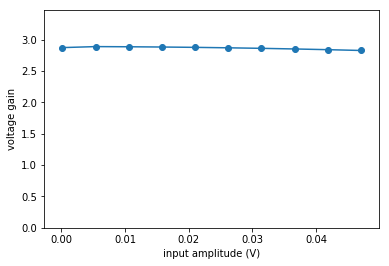

In [8]:
plt.plot(in_amp,out_amp/in_amp)
plt.scatter(in_amp,out_amp/in_amp)
plt.xlabel("input amplitude (V)")
plt.ylabel("voltage gain")
plt.ylim(0,np.max(out_amp/in_amp)*1.2)
plt.show()